<a href="https://colab.research.google.com/github/Fuenfgeld/HospitalNavigator/blob/main/HospitalNavPrototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

### To initialize the code click Runtime and then Run all
<img src="https://github.com/Fuenfgeld/HospitalNavigator/raw/main/img/RunAll.png" width="520" height="132" alt="Run All"/>


---


### Every Cell can be run individualy by clicking the Play Button
<img src="https://github.com/Fuenfgeld/HospitalNavigator/raw/main/img/RunCell.png" width="295" height="88" />


---



In [169]:
import folium
from folium import plugins
import pandas as pd

import ipywidgets
import os
import json

from IPython.display import YouTubeVideo
import datetime

## To learn the basics about geo visualisation in Python check out this Video about the cholera outbreak in broad street

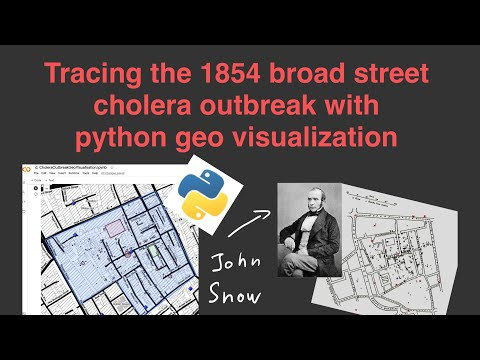

In [170]:
YouTubeVideo('G_5_Cs6i97M',width=700, height=450, )

In [171]:
!git clone https://github.com/Fuenfgeld/HospitalNavigator.git

fatal: destination path 'HospitalNavigator' already exists and is not an empty directory.



---
## Intitialize Map
---

In [172]:
# the latitude and Longitude coordinates
UMMlocation = (49.49216583285166, 8.484229445457458)
map_UMM = folium.Map(location = UMMlocation, width = "75%", zoom_start = 17) # max zoom: 18
map_UMM

---
## Display geojson Outline
---
geojson drawing tool: http://geojson.io/

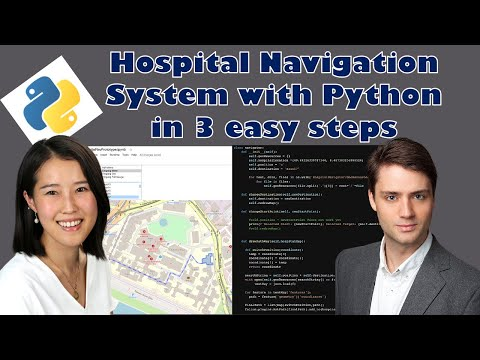

In [173]:
startTime=int(datetime.timedelta(minutes=6, seconds=30).total_seconds())
YouTubeVideo('I8vSpyIj3Cs',width=700, height=450, start=startTime)

In [174]:
hauseOutline = 'HospitalNavigator/GeoResources/Haus22.geojson'
display(folium.GeoJson(hauseOutline, name="Haus22").add_to(map_UMM))
display(map_UMM)

---
##Display Ant Path
---

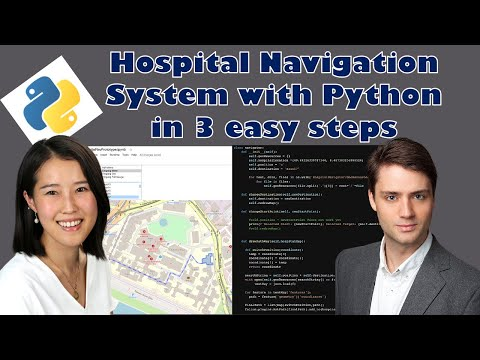

In [175]:
YouTubeVideo('I8vSpyIj3Cs',width=700, height=450, start=int(datetime.timedelta(minutes=9, seconds=35).total_seconds()))

In [176]:
testGeoJson = 'HospitalNavigator/GeoResources/path/w17.geojson'

In [177]:
def switchPosition(coordinate):
  temp = coordinate[0]
  coordinate[0] = coordinate[1]
  coordinate[1] = temp
  return coordinate

In [178]:
with open(testGeoJson) as f:
  testWay = json.load(f)

for feature in testWay['features']:
    path = feature['geometry']['coordinates']
finalPath = list(map(switchPosition,path))
finalPath

[[49.49213534374249, 8.484166413545609],
 [49.49232786037041, 8.484299182891846],
 [49.49233047371309, 8.484493643045425],
 [49.492218099851804, 8.484871834516525],
 [49.49142363542676, 8.487555384635925],
 [49.49185222967887, 8.487834334373474],
 [49.491712849846046, 8.488343954086304],
 [49.492029938390125, 8.488638997077942],
 [49.49251776290861, 8.488982319831848],
 [49.49222506878094, 8.489341735839844],
 [49.49217977072383, 8.489529490470886],
 [49.49220764645621, 8.489856719970703]]

In [179]:
path = 'HospitalNavigator/GeoResources/path/w17.geojson'
folium.plugins.AntPath([[49.49213534374249, 8.484166413545609],
 [49.49232786037041, 8.484299182891846],
 [49.49233047371309, 8.484493643045425],
 [49.492218099851804, 8.484871834516525],
 [49.49142363542676, 8.487555384635925],
 [49.49185222967887, 8.487834334373474],
 [49.491712849846046, 8.488343954086304],
 [49.492029938390125, 8.488638997077942],
 [49.49251776290861, 8.488982319831848],
 [49.49222506878094, 8.489341735839844],
 [49.49217977072383, 8.489529490470886],
 [49.49220764645621, 8.489856719970703]]).add_to(map_UMM)
map_UMM

---
## Select Widget
---

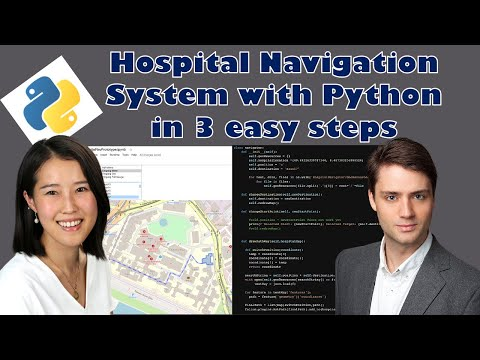

In [180]:
YouTubeVideo('I8vSpyIj3Cs',width=700, height=450, start=int(datetime.timedelta(minutes=12, seconds=49).total_seconds()))

In [181]:
select_widget=ipywidgets.Select(
    options=['Option A', 'Option B'],
    value='Option A',
    description='Select',
    disabled=False)

def selectOption(opt):
    if opt == 'Option A':
        print('A')
    if opt == 'Option B':
        print('B')

ipywidgets.interact(selectOption, opt=select_widget)

interactive(children=(Select(description='Select', options=('Option A', 'Option B'), value='Option A'), Output…

<function __main__.selectOption(opt)>



---
## Build Navigator Prototype
---




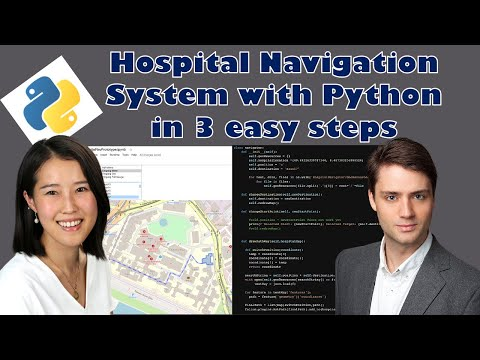

In [182]:
YouTubeVideo('I8vSpyIj3Cs',width=700, height=450, start=int(datetime.timedelta(minutes=15, seconds=1).total_seconds()))

In [183]:
from navigator_class import navigator

dest = input("Enter your destination: ")

# class navigator:
#     def __init__(self):
#         self.geoResources = {}
#         self.hospitalLocation =(49.49226339787344, 8.487303256988524)
#         self.position = 'w'
#         self.destination = dest

#         for root, dirs, files in os.walk('HospitalNavigator/GeoResources'):  
#             for file in files:
#                 self.geoResources[file.split('.')[0]] = root+'/'+file

#     def changeDestination(self,newDestination):
#         self.destination = newDestination
#         self.redrawMap()

#     def changeStartPoint(self, newStartPoint):
        
#         #self.position = newStartPoint #does not work yet
#         print(f'Selected Start: {newStartPoint}; Selected Target: {self.destination}')
#         #self.redrawMap()
        

#     def drawPathWay(self,hospitalMap):
      
#       def switchPosition(coordinate):
#         temp = coordinate[0]
#         coordinate[0] = coordinate[1]
#         coordinate[1] = temp
#         return coordinate

#       searchString = self.position + self.destination.split('Haus')[1]
#       with open(self.geoResources[searchString]) as f:
#            testWay = json.load(f)

#       for feature in testWay['features']:
#         path = feature['geometry']['coordinates']

#       finalPath = list(map(switchPosition,path))
#       folium.plugins.AntPath(finalPath).add_to(hospitalMap)

#     def drawBuilding(self,hospitalMap):
#       hauseOutline = self.geoResources[self.destination]
#       folium.GeoJson(hauseOutline, name="geojson").add_to(hospitalMap)

#     def redrawMap(self):
#         #print(f'position {self.position}, destination {self.destination}')
#         hospitalMap = folium.Map(location = self.hospitalLocation, width = "75%", zoom_start = 17)
#         self.drawPathWay(hospitalMap)
#         self.drawBuilding(hospitalMap)
#         display(hospitalMap)




In [184]:
myNavigator = navigator(dest)

In [185]:
def displayWay(whereTo):
     myNavigator.changeDestination(whereTo)

In [186]:
def changePosition(whereFrom):
    myNavigator.changeStartPoint(whereFrom)

In [187]:
# Destination Selector
selectHouse_widget=ipywidgets.Select(
    
options=['Haus1',
    'Haus10',
    'Haus11',
    'Haus12',
    'Haus13',
    'Haus14',
    'Haus15',
    'Haus16',
    'Haus17',
    'Haus19',
    'Haus2',
    'Haus20',
    'Haus22',
    'Haus24',
    'Haus25',
    'Haus26',
    'Haus27',
    'Haus28',
    'Haus29',
    'Haus3',
    'Haus30',
    'Haus31',
    'Haus32',
    'Haus33',
    'Haus34',
    'Haus35',
    'Haus36',
    'Haus37',
    'Haus39',
    'Haus4',
    'Haus40',
    'Haus41',
    'Haus42',
    'Haus43',
    'Haus5',
    'Haus6',
    'Haus7',
    'Haus8',
    'Haus9'],
    value=dest,
    description='Target',
    disabled=False)

# widget function
def selectHouse(way):
    if way == 'Haus1' :
        displayWay('Haus1' ) 
    if way == 'Haus10':
        displayWay('Haus10')
    if way == 'Haus11':
        displayWay('Haus11')
    if way == 'Haus12':
        displayWay('Haus12')
    if way == 'Haus13':
        displayWay('Haus13')
    if way == 'Haus14':
        displayWay('Haus14')
    if way == 'Haus15':
        displayWay('Haus15')
    if way == 'Haus16':
        displayWay('Haus16')
    if way == 'Haus17':
       displayWay('Haus17')
    if way == 'Haus19':
        displayWay('Haus19')
    if way == 'Haus2' :
        displayWay('Haus2' ) 
    if way == 'Haus20':
        displayWay('Haus20')
    if way == 'Haus22':
        displayWay('Haus22')
    if way == 'Haus24':
        displayWay('Haus24')
    if way == 'Haus25':
        displayWay('Haus25')
    if way == 'Haus26':
        displayWay('Haus26')
    if way == 'Haus27':
        displayWay('Haus27')
    if way == 'Haus28':
        displayWay('Haus28')
    if way == 'Haus29':
        displayWay('Haus29')
    if way == 'Haus3' :
        displayWay('Haus3' ) 
    if way == 'Haus30':
        displayWay('Haus30')
    if way == 'Haus31':
        displayWay('Haus31')
    if way == 'Haus32':
        displayWay('Haus32')
    if way == 'Haus33':
        displayWay('Haus33')
    if way == 'Haus34':
        displayWay('Haus34')
    if way == 'Haus35':
        displayWay('Haus35')
    if way == 'Haus36':
        displayWay('Haus36')
    if way == 'Haus37':
        displayWay('Haus37')
    if way == 'Haus39':
        displayWay('Haus39')
    if way == 'Haus4' :
        displayWay('Haus4' ) 
    if way == 'Haus40':
        displayWay('Haus40')
    if way == 'Haus41':
        displayWay('Haus41')
    if way == 'Haus42':
        displayWay('Haus42')
    if way == 'Haus43':
        displayWay('Haus43')
    if way == 'Haus5' :
        displayWay('Haus5' ) 
    if way == 'Haus6' :
        displayWay('Haus6' ) 
    if way == 'Haus7' :
        displayWay('Haus7' ) 
    if way == 'Haus8' :
        displayWay('Haus8' ) 
    if way == 'Haus9' :
        displayWay('Haus9' ) 

# Position Selector
selectPosition_widget=ipywidgets.Select(
    options=['Aufnahme', 'Eingang West', 'Eingang Ost', 'Eingang Fahrzeuge'],
    value='Eingang West',
    description='Start',
    disabled=False)

def selectPosition(position):
    if position == 'Aufnahme':
        changePosition('a')
    if position == 'Eingang West':
        changePosition('w')
    if position == 'Eingang Ost':
        changePosition('o')
    if position == 'Eingang Fahrzeuge':
        changePosition('f')
        
#Initialization   
ipywidgets.interact(selectPosition, position=selectPosition_widget)
ipywidgets.interact(selectHouse, way=selectHouse_widget)

interactive(children=(Select(description='Start', index=1, options=('Aufnahme', 'Eingang West', 'Eingang Ost',…

interactive(children=(Select(description='Target', index=19, options=('Haus1', 'Haus10', 'Haus11', 'Haus12', '…

<function __main__.selectHouse(way)>

In [188]:
myNavigator.save_state('navigator_state.pkl')